# APIs and Python

## The Many Use Cases for APIs
APIs can actually be used for many things - not just for retrieving information. Twilio has an API that allows you to write a script to call their API to send text messages to people. GitHub has an API for creating new repositories. Many services have an API allowing a computer to automate a task that a person might otherwise have to do through a website - whether uploading a photo to Flickr, searching for a company name in a state database or getting a list of garbage collection times for a municipality.

### _Learning Goals:_<br/>
  - Identify and discuss APIs
  - Discuss and explain different request (GET, POST, PUT, DELETE) and CRUD operations
  - Explore the attributes of a response object
  - Check the status of a request and interpret status codes
  - Access data from an API using the requests library
  - Create a pandas dataframe from the data returned from an API and visualize the data
  - If time, target an API of their own!!!

## Limitations of APIs
When working with APIs, there are some limitations you have to be aware of - especially relating to scope and scale.

* **Scope** - Just because a company has an API and has information, it doesn't mean you can get all of the information through their API. 

* **Scale** - Some APIs are provided for free as a public service. Others you have to pay for, or allow you to perform activities (like sending a text message) that you pay for. Make sure that you know what the rate limits are and that your use case isn't going to need more API calls than you will be able to make.

Let's take a look at the `requests` library and it's uses.

### "Requests is the only Non-GMO HTTP library for Python, safe for human consumption."

![img-req](requests-pic.jpeg)

Straight from the `requests` [documentation](https://pypi.org/project/requests/)

![nongmao](requests_med.png)

"Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor. "<br>
[More requests documentation](https://2.python-requests.org//en/v0.10.6/api/)

### Let's get started!

In [2]:
import requests

In [3]:
#!pip install requests

### Types of requests

We will mostly use GET, but there are other options

Let's say you are looking at an API for a car rental company like Hertz, or maybe even Zipcar.

The following different requests will generate these different responses.

|Request        | Result        |
|-------------|-------------|
|GET /stores/   | User sees the list of stores|
|GET /rentals/  | User sees the history of car rentals|
|POST /rentals/ | User rents a car|
|PUT /rentals/{id}/| User changes destination store|
|DELETE /rentals/{id}/| User cancels the active car rental|




In [4]:
rental_json = [{
    "id": 1,
    "name": "John St",
    "location": [29, 95],
    "available_cars_quantity": 10
},
{
    "id": 2,
    "name": "Scott St.",
    "location": [29.5, 95.7],
    "available_cars_quantity": 2
}]

In [6]:
#create a post request from https://httpbin.org/post and view it in json format

r = requests.post('https://httpbin.org/post', data = {'key':'value'}) #put url and data = {'key':'value'} format here in the bananas!
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '9',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'json': None,
 'origin': '65.207.79.74, 65.207.79.74',
 'url': 'https://httpbin.org/post'}

### Request Class and Attributes

In [7]:
#create a GET request from https://api.github.com/events and view it in json format

r =requests.get('https://api.github.com/events') #put url here in the bananas!
type(r)

requests.models.Response

In [11]:
r.json()

{'message': "API rate limit exceeded for 65.207.79.74. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)",
 'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}

In [12]:
r.text

'{"message":"API rate limit exceeded for 65.207.79.74. (But here\'s the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)","documentation_url":"https://developer.github.com/v3/#rate-limiting"}'

Let's check the `attributes` of a `Response` object. <br>
https://2.python-requests.org//en/v0.10.6/api/

Some key attributes:

- url
- text
- status_code
- headers
- error

### Checking out the status of your request

In [14]:
#get the status of your post request
r.status_code

403

#### Types of status codes
1xx - Informational responses

2xx - Success
- 200 OK
- 201 Created
- 204 No Content

3xx - Redirection

- 301 Moved Permanently (permanent URL redirection)
- 304 Not Modified (A conditional GET or HEAD request has been received and would have resulted in a 200 OK response if it were not for the fact that the condition evaluated to false.)

4xx - Client errors

- 400 Bad Request
- 401 Unauthorized
- 403 Forbidden
- 404 Not Found

5xx - Server errors

- 500 Internal Server Error

https://http.cat

In [15]:
#get status code for a "broken" link

r = requests.get('https://api.github.com/fake-ending')
r.status_code

404

Can also explictly ask for the returned format to be json as a method.

In [16]:
r.json()

{'message': 'Not Found',
 'documentation_url': 'https://developer.github.com/v3'}

#### A note on errors and exceptions with the Requests library

There are a number of exceptions and error codes you need to be familiar with when using the Requests library in Python.

- The Requests library will raise a ConnectionError exception if there is a network problem like a DNS failure, or refused connection.
- These are rare, but with invalid HTTP responses, Requests will also raise an HTTPError exception. 
- A Timeout exception will be raised if a request times out.
- If and when a request exceeds the preconfigured number of maximum redirections, then a TooManyRedirects exception will be raised

Now that we know a bit more about APIs and how to interact with them in python, let's actually investigate an API from scratch. 

To start, go over to the API documentation at: 

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv


<img src="311_api_docs.png">

## Make an initial API call to retrieve 311 complaints from a neighborhood or zip code of your choice in New York City.

### Using Requests

In [17]:
import requests
import pandas as pd

zip_code = '11004'

# can't figure out date ranges at the moment...
start_date = '2018-01-01T12:00:00'
end_date = '2018-02-01T12:00:00'

# create pull request based on parameters
# https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 click API

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# do the pull
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

## Briefly Explore the Structure of the Response You Received.

### Let's look at the output of our API call to NYC 311

In [18]:
print(type(data))

<class 'list'>


In [19]:
len(data)

1000

In [20]:
data[0]

{'address_type': 'ADDRESS',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'bbl': '4084460001',
 'borough': 'QUEENS',
 'city': 'GLEN OAKS',
 'closed_date': '2019-05-14T00:45:22.000',
 'community_board': '13 QUEENS',
 'complaint_type': 'Noise - Residential',
 'created_date': '2019-05-13T23:06:30.000',
 'cross_street_1': '73 AVENUE',
 'cross_street_2': 'BEND',
 'descriptor': 'Banging/Pounding',
 'due_date': '2019-05-14T07:06:30.000',
 'facility_type': 'Precinct',
 'incident_address': '73-01 260 STREET',
 'incident_zip': '11004',
 'latitude': '40.75076013157645',
 'location': {'type': 'Point',
  'coordinates': [-73.717529079357, 40.750760131576]},
 'location_type': 'Residential Building/House',
 'longitude': '-73.7175290793568',
 'open_data_channel_type': 'ONLINE',
 'park_borough': 'QUEENS',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2019-05-14T00:45:22.000',
 'resolution_description': 'The Police Department responded to the complaint

### Libraries for company-specific APIs

Google has its own libraries you can import to access their apis. <br>
NYC also uses the `sodapy` library, Socrata, to manage their open data. 


#### Extra credit for later if you want to play with it

In [21]:
# Install before running 
!pip install sodapy

     |████████████████████████████████| 61kB 3.1MB/s eta 0:00:01
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Tokenize yourself, B!

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

Scroll down and click to sign up for an app token! This is instantaneous and simple. No credit cards required!


In [22]:
token = '' 

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11004', limit=1000)

In [23]:
type(results)

list

In [24]:
len(results)

1000

In [25]:
results[0]

{'address_type': 'ADDRESS',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'bbl': '4084460001',
 'borough': 'QUEENS',
 'city': 'GLEN OAKS',
 'closed_date': '2019-05-14T00:45:22.000',
 'community_board': '13 QUEENS',
 'complaint_type': 'Noise - Residential',
 'created_date': '2019-05-13T23:06:30.000',
 'cross_street_1': '73 AVENUE',
 'cross_street_2': 'BEND',
 'descriptor': 'Banging/Pounding',
 'due_date': '2019-05-14T07:06:30.000',
 'facility_type': 'Precinct',
 'incident_address': '73-01 260 STREET',
 'incident_zip': '11004',
 'latitude': '40.75076013157645',
 'location': {'type': 'Point',
  'coordinates': [-73.717529079357, 40.750760131576]},
 'location_type': 'Residential Building/House',
 'longitude': '-73.7175290793568',
 'open_data_channel_type': 'ONLINE',
 'park_borough': 'QUEENS',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2019-05-14T00:45:22.000',
 'resolution_description': 'The Police Department responded to the complaint

In [26]:

df_1 = pd.DataFrame(results)

print(len(df_1))
print(df_1.columns)
df_1.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,4084460001,QUEENS,GLEN OAKS,2019-05-14T00:45:22.000,13 QUEENS,Noise - Residential,2019-05-13T23:06:30.000,...,QUEENS,Unspecified,2019-05-14T00:45:22.000,The Police Department responded to the complai...,Closed,260 STREET,NaN,42663284,1062514,212925
1,BLOCKFACE,DOT,Department of Transportation,NaN,QUEENS,Glen Oaks,NaN,13 QUEENS,Street Condition,2019-05-13T11:39:14.000,...,QUEENS,Unspecified,2019-05-13T11:39:14.000,The Department of Transportation referred this...,Open,73 AVENUE,NaN,42663518,1062558,213091
2,ADDRESS,DEP,Department of Environmental Protection,4084430237,QUEENS,Glen Oaks,NaN,13 QUEENS,Sewer,2019-05-13T20:50:00.000,...,QUEENS,Unspecified,NaN,NaN,Open,LITTLE NECK PARKWAY,NaN,42662708,1061214,213791
3,INTERSECTION,DEP,Department of Environmental Protection,NaN,QUEENS,Glen Oaks,NaN,13 QUEENS,Sewer,2019-05-13T16:50:00.000,...,QUEENS,Unspecified,NaN,NaN,Open,NaN,NaN,42660564,1064245,210023
4,ADDRESS,DOT,Department of Transportation,4084420001,QUEENS,GLEN OAKS,NaN,13 QUEENS,Street Condition,2019-05-13T11:43:22.000,...,QUEENS,Unspecified,NaN,The Department of Transportation requires 10 d...,Open,LITTLE NECK PARKWAY,NaN,42660605,1061834,212496


## Create a Pandas DataFrame of the Data From the Response

In [27]:
df_2 = pd.DataFrame(data)

print(len(df_2))
print(df_2.columns)
df_2.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,4084460001,QUEENS,GLEN OAKS,2019-05-14T00:45:22.000,13 QUEENS,Noise - Residential,2019-05-13T23:06:30.000,...,QUEENS,Unspecified,2019-05-14T00:45:22.000,The Police Department responded to the complai...,Closed,260 STREET,NaN,42663284,1062514,212925
1,BLOCKFACE,DOT,Department of Transportation,NaN,QUEENS,Glen Oaks,NaN,13 QUEENS,Street Condition,2019-05-13T11:39:14.000,...,QUEENS,Unspecified,2019-05-13T11:39:14.000,The Department of Transportation referred this...,Open,73 AVENUE,NaN,42663518,1062558,213091
2,ADDRESS,DEP,Department of Environmental Protection,4084430237,QUEENS,Glen Oaks,NaN,13 QUEENS,Sewer,2019-05-13T20:50:00.000,...,QUEENS,Unspecified,NaN,NaN,Open,LITTLE NECK PARKWAY,NaN,42662708,1061214,213791
3,INTERSECTION,DEP,Department of Environmental Protection,NaN,QUEENS,Glen Oaks,NaN,13 QUEENS,Sewer,2019-05-13T16:50:00.000,...,QUEENS,Unspecified,NaN,NaN,Open,NaN,NaN,42660564,1064245,210023
4,ADDRESS,DOT,Department of Transportation,4084420001,QUEENS,GLEN OAKS,NaN,13 QUEENS,Street Condition,2019-05-13T11:43:22.000,...,QUEENS,Unspecified,NaN,The Department of Transportation requires 10 d...,Open,LITTLE NECK PARKWAY,NaN,42660605,1061834,212496


## Create a Histogram of the Complaint Types From Your Dataset

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

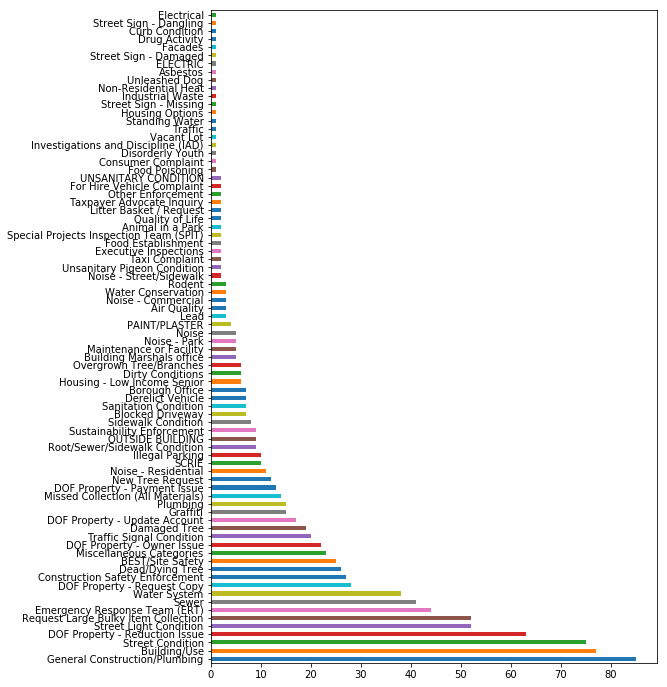

In [29]:
df_2.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))

## If we have time:

https://github.com/toddmotto/public-apis


find a buddy, find a free api, get the key, and do a get. Try to transform the response into a df.